## Understanding Multivariate Normal Disitrbution

### Reza Bagheri

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from numpy import linalg as LA
from scipy.stats import norm, multivariate_normal, bernoulli
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Normal distribution

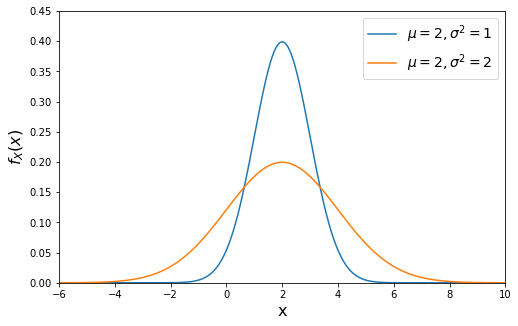

In [2]:
x = np.arange(-6, 10, 0.01)
mu = 2
sigma1 = 1
sigma2 = 2
y1 = norm.pdf(x, loc = mu, scale = sigma1)
y2 = norm.pdf(x, loc = mu, scale = sigma2)
plt.figure(figsize=(8, 5))

plt.plot(x, y1, label='$\mu={}, \sigma^2={}$'.format(mu, sigma1))
plt.plot(x, y2, label='$\mu={}, \sigma^2={}$'.format(mu, sigma2))
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_X(x)$', fontsize=16)
plt.xlim([-6, 10])
plt.ylim([0, 0.45])
plt.legend(loc='best', fontsize=14)

plt.show()

### Mean and covariance matrix

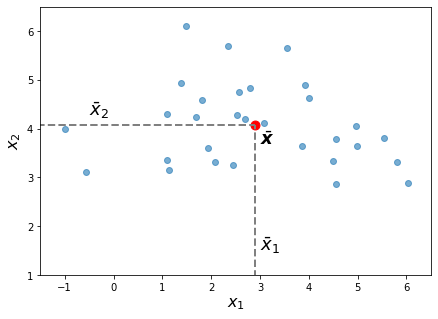

In [3]:
np.random.seed(1)
mu1=3
mu2=4
x1 = norm.rvs(loc=mu1, scale=np.sqrt(3), size=30)
x2 = norm.rvs(loc=mu2, scale=1, size=30)

fig = plt.figure(figsize=(7, 7))
plt.scatter(x1, x2, alpha = 0.6)
plt.scatter(x1.mean(), x2.mean(), color='red', s=80)

plt.plot([x1.mean(), x1.mean()], [-2, x2.mean()], color='grey', linewidth=2, linestyle='--')
plt.plot([-2, x1.mean()], [x2.mean(), x2.mean()], color='grey', linewidth=2, linestyle='--')
plt.text(x1.mean()+0.1, x2.mean()-0.4, r"$\bar{\mathregular{x}}$", fontsize=18, style="italic", weight="bold")
plt.text(x1.mean()+0.1, 1.5, r"$\bar{x}_1$", fontsize=18, style="italic", weight="bold")
plt.text(-0.5, x2.mean()+0.2, r"$\bar{x}_2$", fontsize=18, style="italic", weight="bold")

plt.xlim([-1.5, 6.5])
plt.ylim([1, 6.5])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

plt.gca().set_aspect('equal')

plt.show()

Sample variance along u = 1.6658


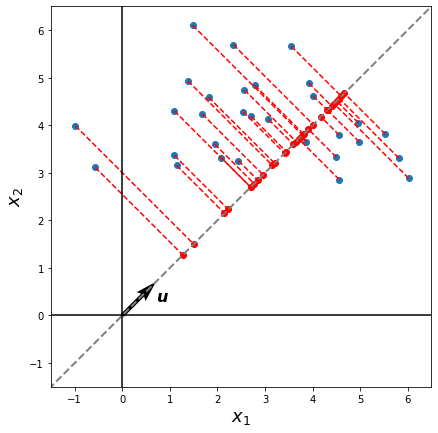

In [4]:
np.random.seed(1)
mu1=3
mu2=4
x1 = norm.rvs(loc=mu1, scale=np.sqrt(3), size=30)
x2 = norm.rvs(loc=mu2, scale=1, size=30)
points = np.vstack((x1,x2))
u = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])

projected_points = np.dot(points.T, u).T * u 
sample_var = np.var(np.dot(points.T, u).T, ddof=1)
print("Sample variance along u =", np.round(sample_var, 4))

fig = plt.figure(figsize=(7, 7))
plt.scatter(x1, x2)
plt.plot([-10, 10], [-10, 10], color='grey', linewidth=2, linestyle='--')

plt.scatter(projected_points[0, :], projected_points[1, :], color='red')
for pair in list(zip(points.T, projected_points.T)):
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='red', linestyle='--')
    
plt.quiver(u[0], u[1], color='black', width=0.011, angles='xy', scale_units='xy', scale=1)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.xlim([-1.5, 6.5])
plt.ylim([-1.5, 6.5])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.text(u[0], u[1]-0.4, "u", fontsize=16, style="italic", weight="bold")
plt.gca().set_aspect('equal')

plt.show()

In [5]:
sample_var = u.T @ np.cov(points, ddof=1) @ u
print("Sample variance along u =", np.round(sample_var, 4))

Sample variance along u = [[1.6658]]


In [6]:
np.random.seed(2)

x1 = norm.rvs(loc=mu1, scale=np.sqrt(3), size=50000)
x2 = norm.rvs(loc=mu2, scale=1, size=50000)
points = np.vstack((x1,x2))
sample_var = u.T @ np.cov(points, ddof=1) @ u
print("Sample variance along u =", np.round(sample_var, 4))

Sample variance along u = [[2.0078]]


### Standard multivariate normal disitrbution

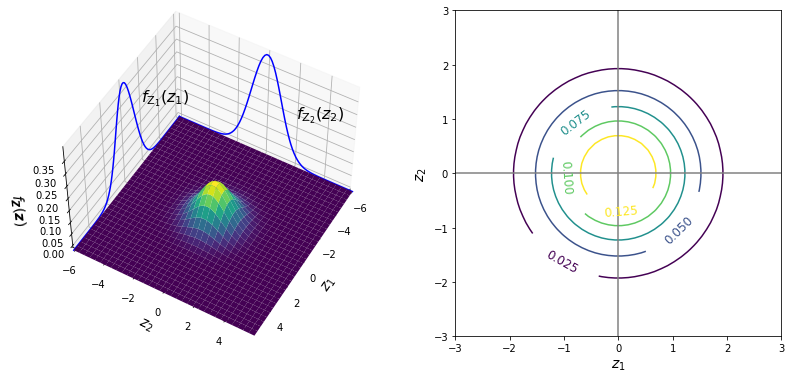

In [7]:
N = 100
z1 = np.linspace(-6, 6, N)
z2 = np.linspace(-6, 6, N)
std_normal_pdf = norm.pdf(z1, 0, 1)
Z1_mat, Z2_mat = np.meshgrid(z1, z2)

# Mean vector and covariance matrix
mu = np.array([0, 0])
Sigma = np.array([[1,  0],
                  [0,  1]])

pos = np.array([Z1_mat.flatten(), Z2_mat.flatten()]).T
smvn_pdf = multivariate_normal(mu, Sigma).pdf(pos).reshape(N, N)

fig = plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.1)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_surface(Z1_mat, Z2_mat, smvn_pdf, rstride=3, cstride=3,
                 linewidth=1, antialiased=True,
                 cmap=cm.viridis)
ax1.plot(z1, z1*0-6, std_normal_pdf, color = 'blue')
ax1.plot(z1*0-6, z1, std_normal_pdf, color = 'blue')
ax1.text(-1.8, -6, 0.25,"$f_\mathrm{Z_1}(z_1)$", fontsize= 16)
ax1.text(-6, 2, 0.2, "$f_\mathrm{Z_2}(z_2)$", fontsize= 16)

ax1.view_init(50, 30)
ax1.set_xlabel("$z_1$", fontsize=14)
ax1.set_ylabel("$z_2$", fontsize=14)
ax1.set_zlabel("$f_\mathregular{Z}(\mathregular{z})$", fontsize=14,
               weight="bold", style="italic", labelpad = 8, rotation=90)
ax1.set_xlim([-6, 5.5])
ax1.set_ylim([-6, 5.5])

contours = ax2.contour(Z1_mat, Z2_mat, smvn_pdf,
                       levels = [0.025, 0.05, 0.075, 0.1, 0.125])
ax2.clabel(contours, inline=True, fontsize=12)
ax2.axhline(y=0, color='gray')
ax2.axvline(x=0, color='gray')
ax2.set_aspect('equal')
ax2.set_xlabel("$z_1$", fontsize=14)
ax2.set_ylabel("$z_2$", fontsize=14)
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])

plt.show()

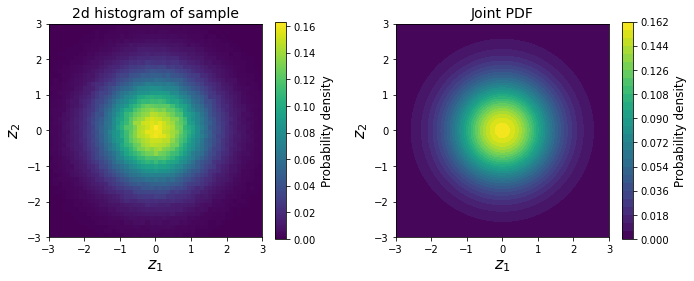

In [8]:
np.random.seed(1)
z1_sample= norm.rvs(loc=0, scale=1, size=1500000)
z2_sample = norm.rvs(loc=0, scale=1, size=1500000)

z1 = np.linspace(-3, 3, 500)
z2 = np.linspace(-3, 3, 500)
Z1_mat, Z2_mat = np.meshgrid(z1, z2)

# Mean vector and covariance matrix
mu = np.array([0, 0])
Sigma = np.array([[1,  0],
                  [0,  1]])

pos = np.array([Z1_mat.flatten(), Z2_mat.flatten()]).T
smvn = multivariate_normal(mu, Sigma)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
plt.subplots_adjust(wspace=0.3)

hist = ax1.hist2d(z1_sample, z2_sample, bins=(80, 80), density=True, cmap='viridis')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_xlabel('$z_1$', fontsize=16)
ax1.set_ylabel('$z_2$', fontsize=16)
ax1.set_aspect('equal')
ax1.set_title("2d histogram of sample", fontsize=14)
cbar1 = fig.colorbar(hist[3], ax = ax1)
cbar1.ax.set_ylabel('Probability density', fontsize=12, labelpad=5)

contours = ax2.contourf(Z1_mat, Z2_mat, smvn.pdf(pos).reshape(500,500), cmap='viridis', levels=30)
ax2.set_xlabel('$z_1$', fontsize=16)
ax2.set_ylabel('$z_2$', fontsize=16)
ax2.set_aspect('equal')    
cbar2 = fig.colorbar(contours, ax = ax2)
cbar2.ax.set_ylabel('Probability density', fontsize=12, labelpad=5)
ax2.set_title("Joint PDF", fontsize=14)

plt.show()

### Multivariate normal distribution

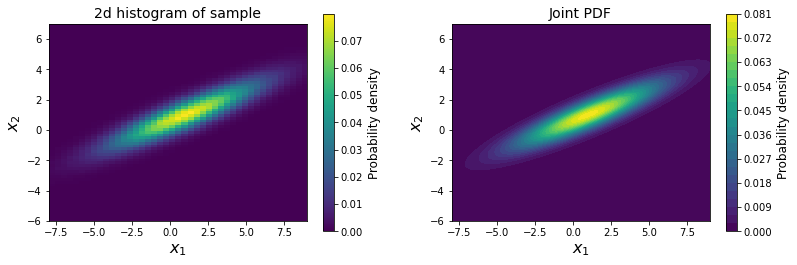

In [9]:
np.random.seed(1)
z1_sample= norm.rvs(loc=0, scale=1, size=1500000)
z2_sample = norm.rvs(loc=0, scale=1, size=1500000)
z_sample = np.vstack((z1_sample, z2_sample))
A = np.array([[3, 1],
              [1, 1]]) 
Sigma = A @ A.T
mu = np.array([[1], [1]])
x_sample = mu + A @ z_sample

x1 = np.linspace(-8, 9, 500)
x2 = np.linspace(-6, 7, 500)
X1_mat, X2_mat = np.meshgrid(x1, x2)

pos = np.array([X1_mat.flatten(), X2_mat.flatten()]).T
mvn = multivariate_normal(mu.flatten(), Sigma)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
plt.subplots_adjust(wspace=0.25)

hist = ax1.hist2d(x_sample[0, :], x_sample[1, :], bins=(80, 80), density=True, cmap='viridis')
ax1.set_xlim(-8, 9)
ax1.set_ylim(-6, 7)
ax1.set_xlabel('$x_1$', fontsize=16)
ax1.set_ylabel('$x_2$', fontsize=16)
ax1.set_aspect('equal')
ax1.set_title("2d histogram of sample", fontsize=14)
cbar1 = fig.colorbar(hist[3], ax = ax1)
cbar1.ax.set_ylabel('Probability density', fontsize=12, labelpad=5)

ax2.set_title("Joint PDF", fontsize=14)
ax1.set_title("2d histogram of sample", fontsize=14)

contours = ax2.contourf(X1_mat, X2_mat, mvn.pdf(pos).reshape(500,500), cmap='viridis', levels=30)
ax2.set_xlabel('$x_1$', fontsize=16)
ax2.set_ylabel('$x_2$', fontsize=16)
ax2.set_aspect('equal')    
cbar2 = fig.colorbar(contours, ax = ax2)
cbar2.ax.set_ylabel('Probability density', fontsize=12, labelpad=5)
ax2.set_title("Joint PDF", fontsize=14)

plt.show()

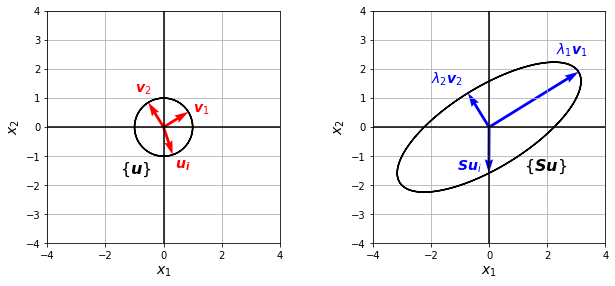

In [10]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
x1 = np.cos(theta)
x2 = np.sin(theta)
u = np.vstack((x1, x2))

# getting a sample vector from u
u_sample = u[:, 400]

S = np.array([[3, 1],
              [1, 2]]) 

# Getting the eigenvectors of S
lam, v = LA.eig(S)

t = S @ u  # Vectors in t are the transformed vectors of u
t_sample = t[:, 400]

origin = [0], [0] # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting {u}
ax1.plot(u[0,:], u[1,:], color='black')
ax1.quiver(*origin, v[0,0], v[1,0], color=['r'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, v[0,1], v[1,1], color=['r'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, u_sample[0], u_sample[1], color=['r'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('$x_1$', fontsize=14)
ax1.set_ylabel('$x_2$', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.5, "$\mathregular{v}_1$", color='r', fontsize=14,
         weight="bold", style="italic")
ax1.text(-1, 1.2, "$\mathregular{v}_2$", color='r', fontsize=14,
         weight="bold", style="italic")
ax1.text(-1.5, -1.6, "$\{\mathregular{u}\}$", color='black',
         fontsize=16, weight="bold", style="italic")
ax1.text(0.4, -1.4, "$\mathregular{u_i}$", color='red', fontsize=14,
         weight="bold", style="italic")

# Plotting {Su}
ax2.plot(t[0, :], t[1, :], color='black')
ax2.quiver(*origin, lam[0] * v[0,0], lam[0] * v[1,0], color=['blue'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, lam[1] * v[0,1], lam[1] * v[1,1], color=['blue'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample[0], t_sample[1], color=['b'], width=0.012,
           angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('$x_1$', fontsize=14)
ax2.set_ylabel('$x_2$', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.3, 2.5, "$\lambda_1\mathregular{v}_1$",
         color='blue', fontsize=14, weight="bold", style="italic")
ax2.text(-2, 1.5, "$\lambda_2\mathregular{v}_2$",
         color='blue', fontsize=14, weight="bold", style="italic")
ax2.text(-1.1, -1.5, "$\mathregular{S}\mathregular{u}_i$",
         color='blue', fontsize=14, weight="bold", style="italic")
ax2.text(1.2, -1.5, "$\{\mathregular{Su}\}$", color='black',
         fontsize=16, weight="bold", style="italic")

plt.show()

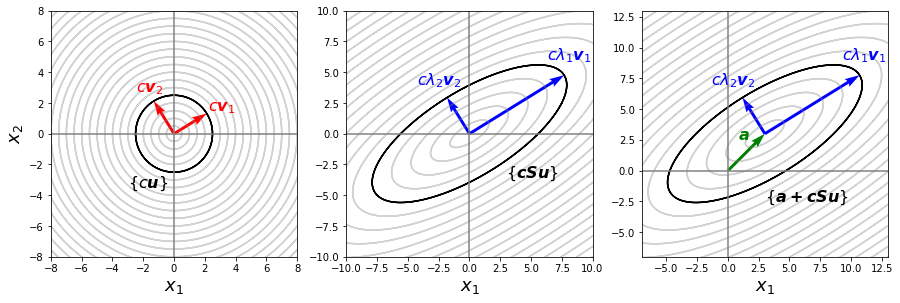

In [11]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
x1 = np.cos(theta)
x2 = np.sin(theta)

u = np.vstack((x1, x2))

S = np.array([[3, 1],
              [1, 2]]) 

a = np.array([[3], [3]])

# Getting the eigenvectors of S
lam, v = LA.eig(S)
origin = [0], [0] # origin point
c_list = np.arange(0.5, 12, 0.5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,20))
plt.subplots_adjust(wspace=0.2)

for c in c_list:
    t = S @ (c*u)  # Vectors in t are the transformed vectors of u
    t1 = a + S @ (c*u)  
    # Plotting {u}
    ax1.plot(c*u[0,:], c*u[1,:], color='grey', alpha = 0.35)
    # Plotting {Su}
    ax2.plot(t[0, :], t[1, :], color='grey', alpha = 0.35)
    # Plotting {a+Su}
    ax3.plot(t1[0, :], t1[1, :], color='grey', alpha = 0.35)

ci = 2.5
t = S @ (ci*u)
t1 = a + S @ (ci*u)
ax1.plot(ci*u[0,:], ci*u[1,:], color='black')
ax2.plot(t[0, :], t[1, :], color='black')
ax3.plot(t1[0, :], t1[1, :], color='black')

ax3.quiver(*origin, a[0], a[1], color=['g'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, ci*v[0,0], ci*v[1,0], color=['r'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, ci*v[0,1], ci*v[1,1], color=['r'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
    
ax2.quiver(*origin, ci * lam[0] * v[0,0], ci * lam[0] * v[1,0], color=['blue'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, ci * lam[1] * v[0,1], ci * lam[1] * v[1,1], color=['blue'],
           width=0.012, angles='xy', scale_units='xy', scale=1)

ax3.quiver(*(a+origin), ci * lam[0] * v[0,0], ci * lam[0] * v[1,0], color=['blue'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax3.quiver(*(a+origin), ci * lam[1] * v[0,1], ci * lam[1] * v[1,1], color=['blue'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
    
ax1.set_xlabel('$x_1$', fontsize=18)
ax1.set_ylabel('$x_2$', fontsize=18)
ax1.set_xlim([-8, 8])
ax1.set_ylim([-8, 8])
ax1.set_aspect('equal')
ax1.set_axisbelow(True)
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')
ax1.text(2.2, 1.5, "$c\mathregular{v}_1$", color='r', fontsize=16,
         weight="bold", style="italic")
ax1.text(-2.5, 2.7, "$c\mathregular{v}_2$", color='r', fontsize=16,
         weight="bold", style="italic")
ax1.text(-3, -3.5, "$\{c\mathregular{u}\}$", color='black',
         fontsize=16, weight="bold", style="italic")

ax2.set_xlabel('$x_1$', fontsize=18)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
ax2.set_aspect('equal')
ax2.axhline(y=0, color='grey')
ax2.axvline(x=0, color='grey')
ax2.text(6.3, 6, "$c\lambda_1\mathregular{v}_1$",
         color='blue', fontsize=16, weight="bold", style="italic")
ax2.text(-4.3, 4, "$c\lambda_2\mathregular{v}_2$",
         color='blue', fontsize=16, weight="bold", style="italic")
ax2.text(3, -3.5, "$\{\mathregular{cSu}\}$", color='black',
         fontsize=16, weight="bold", style="italic")

ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_xlim([-7,13])
ax3.set_ylim([-7,13])
ax3.set_aspect('equal')
ax3.axhline(y=0, color='grey')
ax3.axvline(x=0, color='grey')
ax3.text(9.3, 9, "$c\lambda_1\mathregular{v}_1$",
         color='blue', fontsize=16, weight="bold", style="italic")
ax3.text(-1.4, 7, "$c\lambda_2\mathregular{v}_2$",
         color='blue', fontsize=16, weight="bold", style="italic")
ax3.text(3, -2.5, "$\{\mathregular{a+cSu}\}$", color='black',
         fontsize=16, weight="bold", style="italic")
ax3.text(0.8, 2.5, "$\mathregular{a}$", color='green',
         fontsize=16, weight="bold", style="italic")

plt.show()

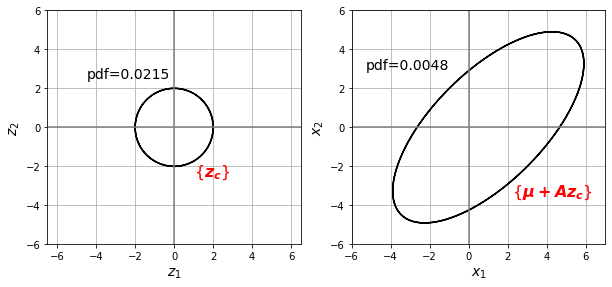

In [12]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
z1 = np.cos(theta)
z2 = np.sin(theta)

zc = 2 * np.vstack((z1, z2))
mu =np.array([[1], [0]])
Sigma = np.array([[6, 4],
                  [4, 6]])

lam, V = LA.eig(Sigma)
A = V @ np.sqrt(np.diag(lam)) @ V.T
t = A @ zc + mu

n=2
c=2
pdf_smvn = 1/(2*np.pi)**(n/2) * np.exp(-c**2/2)
pdf_mvn = pdf_smvn / np.sqrt(np.linalg.det(Sigma))

origin = [0], [0] # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.2)

ax1.plot(zc[0,:], zc[1,:], color='black')
ax1.set_xlabel("$z_1$", fontsize=14)
ax1.set_ylabel("$z_2$", fontsize=14)
ax1.set_xlim([-6.5,6.5])
ax1.set_ylim([-6,6])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')
ax1.text(-4.5, 2.5, "pdf={}".format(round(pdf_smvn, 4)), fontsize=14)
ax1.text(1, -2.5, "$\{\mathregular{z_c}\}$",color='r', fontsize=16, weight="bold", style="italic")

ax2.plot(t[0, :], t[1, :], color='black')
ax2.set_xlabel("$x_1$", fontsize=14)
ax2.set_ylabel("$x_2$", fontsize=14)
ax2.set_xlim([-6,7])
ax2.set_ylim([-6,6])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.axhline(y=0, color='grey')
ax2.axvline(x=0, color='grey')
ax2.text(-5.3, 3, "pdf={}".format(round(pdf_mvn, 4)), fontsize=14)
ax2.text(2.2, -3.5, "$\{\mathregular{\mu+Az_c}\}$",color='r', fontsize=16, weight="bold", style="italic")

plt.show()

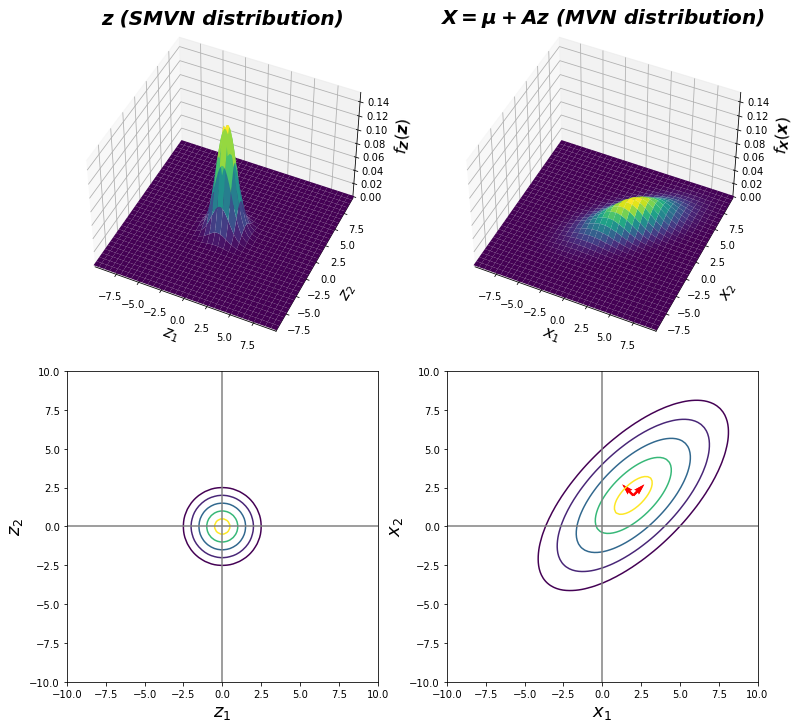

In [13]:
N = 100
x1 = np.linspace(-10, 10, N)
x2 = np.linspace(-10, 10, N)
X1_mat, X2_mat = np.meshgrid(x1, x2)
origin = [0], [0]

# Mean vector and covariance matrix
mu1 = np.array([0, 0])
mu2 = np.array([2, 2])

Sigma1 = np.array([[1, 0],
                   [0, 1]])
 
Sigma2 = np.array([[6, 4],
                   [4, 6]])

lam, v = LA.eig(Sigma2)

smvn = multivariate_normal(mu1, Sigma1)
smvn_levels = [smvn.pdf([[i,0]]) for i in np.arange(2.5, 0, -0.5)]
mvn_levels = [smvn.pdf([[i,0]])/ np.sqrt(np.linalg.det(Sigma2)) \
              for i in np.arange(2.5, 0, -0.5)]

pos = np.array([X1_mat.flatten(), X2_mat.flatten()]).T

smvn_pdf = multivariate_normal(mu1, Sigma1).pdf(pos).reshape(N, N)
mvn_pdf = multivariate_normal(mu2, Sigma2).pdf(pos).reshape(N, N)

fig = plt.figure(figsize=(13, 12))
plt.subplots_adjust(wspace = 0.1, hspace=0.1)

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#Plot 1
ax1.plot_surface(X1_mat, X2_mat, smvn_pdf, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax1.view_init(45, -65)
ax1.set_xlabel("$z_1$", fontsize=16)
ax1.set_ylabel("$z_2$", fontsize=16, labelpad= 9)
ax1.set_zlabel("$f_\mathregular{Z}(\mathregular{z})$", fontsize=16, weight="bold", style="italic", labelpad= 9)
ax1.set_xlim([-9.5, 9.5])
ax1.set_ylim([-9.5, 9.5])
ax1.set_zlim([0, 0.15])
ax1.set_title("z (SMVN distribution)", weight="bold", style="italic", fontsize=20)

#Plot 2
ax2.plot_surface(X1_mat, X2_mat, mvn_pdf, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax2.view_init(45, -65)
ax2.set_xlabel("$x_1$", fontsize=16)
ax2.set_ylabel("$x_2$", fontsize=16 ,labelpad= 9)
ax2.set_zlabel("$f_\mathregular{X}(\mathregular{x})$", fontsize=16, weight="bold", style="italic", labelpad= 9)
ax2.set_xlim([-9.5, 9.5])
ax2.set_ylim([-9.5, 9.5])
ax2.set_zlim([0, 0.15])
ax2.set_title("$\mathregular{X=\mu+Az}$ (MVN distribution)", weight="bold", style="italic", fontsize=20)

#Plot 3
ax3.contour(X1_mat, X2_mat, smvn_pdf, levels = smvn_levels)
ax3.axhline(y=0, color='gray')
ax3.axvline(x=0, color='gray')
ax3.set_xlabel("$z_1$", fontsize=18)
ax3.set_ylabel("$z_2$", fontsize=18)
ax3.set_aspect('equal')

#Plot 4
ax4.contour(X1_mat, X2_mat, mvn_pdf, levels = mvn_levels)
ax4.quiver(*origin+mu2, v[0,0], v[1,0], color=['r'], width=0.007, angles='xy', scale_units='xy', scale=1)
ax4.quiver(*origin+mu2, v[0,1], v[1,1], color=['r'], width=0.007, angles='xy', scale_units='xy', scale=1)
ax4.axhline(y=0, color='gray')
ax4.axvline(x=0, color='gray')
ax4.set_xlabel("$x_1$", fontsize=18)
ax4.set_ylabel("$x_2$", fontsize=18)
ax4.set_aspect('equal')

plt.show()

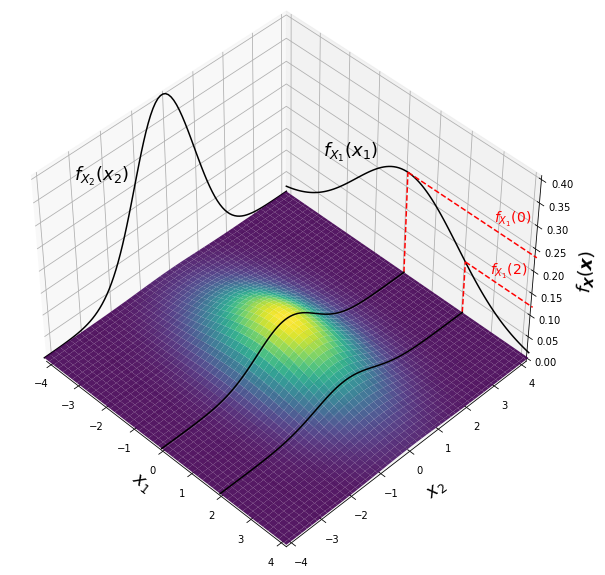

In [14]:
N = 100
x1 = np.linspace(-4.2, 4.2, N)
x2 = np.linspace(-4.2, 4.2, N)
X1_mat, X2_mat = np.meshgrid(x1, x2)

x1_p1 = np.zeros(N)
x1_p2 = np.ones(N) * 2
points_p1 = np.dstack([x1_p1, x2])
points_p2 = np.dstack([x1_p2, x2])

# Mean vector and covariance matrix
var_x1 = 3
var_x2 = 1
mu1 = 0
mu2 = 0
mu = np.array([mu1, mu2])
Sigma = np.array([[var_x1, 0],
                  [0, var_x2]])

ystd1= norm.pdf(x1, mu1, np.sqrt(var_x1))
ystd2= norm.pdf(x1, mu2, np.sqrt(var_x2))

pos = np.array([X1_mat.flatten(), X2_mat.flatten()]).T

mvn_pdf = multivariate_normal(mu, Sigma).pdf(pos).reshape(N, N)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.plot_surface(X1_mat, X2_mat, mvn_pdf, alpha= 0.9, color='gray', cmap=cm.viridis)
ax.plot(x1_p1, x2, multivariate_normal(mu, Sigma).pdf(points_p1), color='black', zorder=5)
ax.plot(x1_p2, x2, multivariate_normal(mu, Sigma).pdf(points_p2), color='black', zorder=5)
ax.plot(x1, x1*0+4.2, ystd1, color = 'black')
ax.plot(x1*0-4.2, x2, ystd2, color = 'black')
ax.plot([0, 0],[4.2, 4.2], [0, norm.pdf(0, mu1, np.sqrt(var_x1))],
        '--', color='red')
ax.plot([0, 4.2],[4.2, 4.2], 
        [norm.pdf(0, mu1, np.sqrt(var_x1)), norm.pdf(0, mu1, np.sqrt(var_x1))],
        '--', color='red')
ax.plot([2, 2],[4.2, 4.2], [0, norm.pdf(2, mu1, np.sqrt(var_x1))],
        '--', color='red')
ax.plot([2, 4.2],[4.2, 4.2],
        [norm.pdf(2, mu1, np.sqrt(var_x1)), norm.pdf(2, mu1, np.sqrt(var_x1))],
        '--', color='red')

ax.view_init(45, -45)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18, labelpad= 9)
ax.set_zlabel("$f_\mathregular{X}(\mathregular{x})$", fontsize=18, weight="bold", style="italic", labelpad= 9)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([0, 0.4])
ax.text(3.1, -2, 0.67,"$f_{X_{1}}(x_{1})$", fontsize= 18)
ax.text(-2.2, -4.5, 0.5, "$f_{X_{2}}(x_{2})$", fontsize= 18)
ax.text(7.9, -2, 0.76,"$f_{X_{1}}(0)$", color='red', fontsize= 14)
ax.text(7.9, -2, 0.66,"$f_{X_{1}}(2)$", color='red', fontsize= 14)

plt.show()

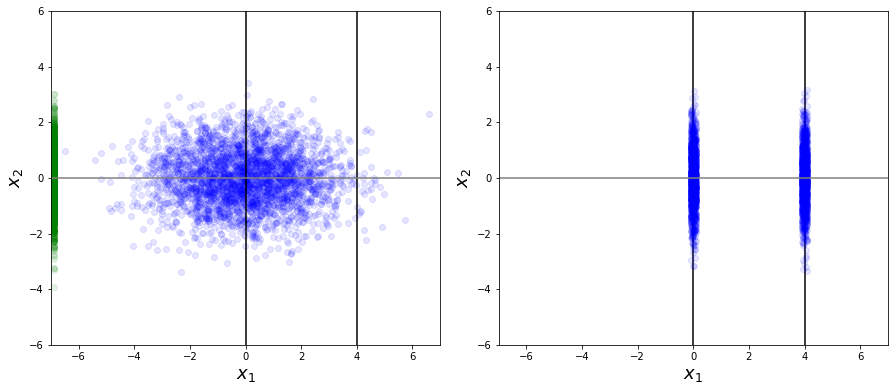

In [15]:
np.random.seed(0)

mu = np.array([0, 0])
Sigma = np.array([[3, 0],
                  [0, 1]])
sample_mvn = np.random.multivariate_normal(mu, Sigma, 3000)
sample_mvn1 = np.random.multivariate_normal(mu, Sigma, 500000)

sample_mvn_p1 = sample_mvn1[(3.9 < sample_mvn1[: ,0]) & \
                            (sample_mvn1[: ,0] < 4.1), :]
sample_mvn_p2 = sample_mvn1[(-0.1 < sample_mvn1[: ,0]) & \
                            (sample_mvn1[: ,0] < 0.1), :][:len(sample_mvn_p1), :]
sample_marginal_x2 = norm.rvs(0, np.sqrt(1), len(sample_mvn_p1))

x1, x2 = sample_mvn.T
x1_p1, x2_p1 = sample_mvn_p1.T
x1_p2, x2_p2 = sample_mvn_p2.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,17))
plt.subplots_adjust(wspace=0.15)

ax1.scatter(x1, x2, color='blue', alpha=0.1)
ax1.scatter(len(sample_marginal_x2)*[-6.9],
            sample_marginal_x2, color='green', alpha=0.1)

ax1.axvline(x=0, color='black')
ax1.axvline(x=4, color='black')
ax1.axhline(y=0, color='grey')

ax1.set_xlabel("$x_1$", fontsize= 18, style="italic")
ax1.set_ylabel("$x_2$", fontsize= 18, style="italic")
ax1.set_aspect('equal')
ax1.set_xlim([-7, 7])
ax1.set_ylim([-6, 6])

ax2.scatter(x1_p1, x2_p1, color='blue', alpha=0.1, zorder=1)
ax2.scatter(x1_p2, x2_p2, color='blue', alpha=0.1, zorder=1)
ax2.axvline(x=0, color='black', zorder=0)
ax2.axvline(x=4, color='black', zorder=0)
ax2.axhline(y=0, color='grey')

ax2.set_xlabel("$x_1$", fontsize= 18, style="italic")
ax2.set_ylabel("$x_2$", fontsize= 18, style="italic")
ax2.set_aspect('equal')
ax2.set_xlim([-7, 7])
ax2.set_ylim([-6, 6])

plt.show()

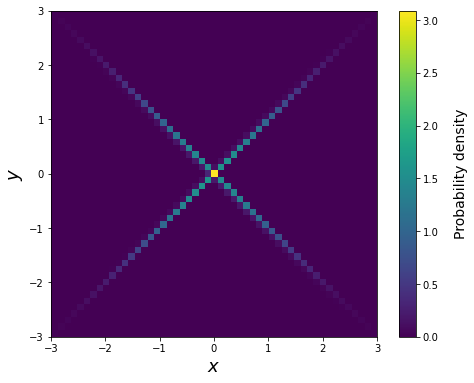

In [16]:
np.random.seed(1)
sample_size = 1500000 
X_sample= norm.rvs(loc=0, scale=1, size=sample_size)
B_sample = bernoulli.rvs(p=0.5, size=sample_size)
Y_sample = (2 * B_sample - 1) * X_sample

vector_sample = np.vstack((X_sample, Y_sample))

fig = plt.figure(figsize=(8, 6))

hist = plt.hist2d(vector_sample[0, :], vector_sample[1, :], bins=(80, 80), density=True, cmap='viridis')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
cbar = fig.colorbar(hist[3])
cbar.ax.set_ylabel('Probability density', fontsize=14, labelpad=15)
plt.gca().set_aspect('equal')

plt.show()

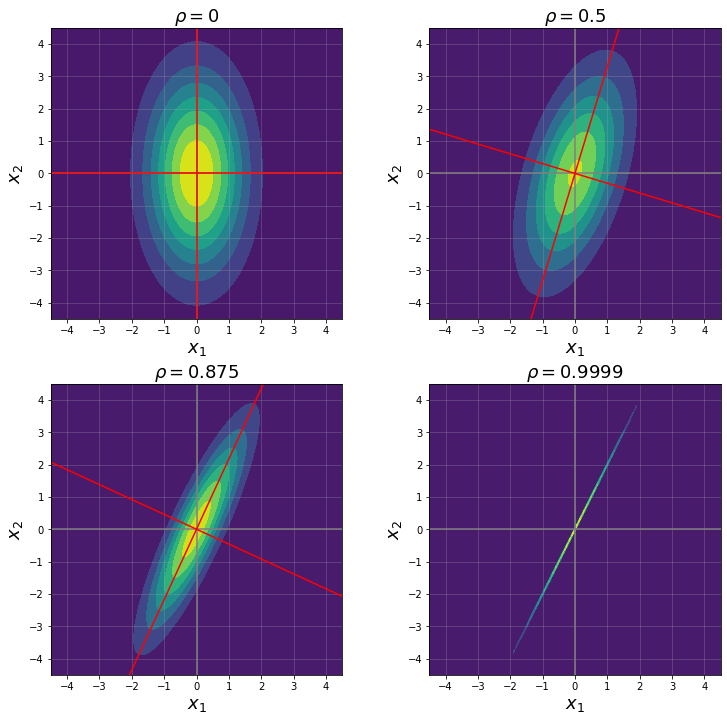

In [17]:
x1 = np.linspace(-6,6,500)
x2 = np.linspace(-6,6,500)
X1_mat, X2_mat = np.meshgrid(x1, x2)

pos = np.array([X1_mat.flatten(), X2_mat.flatten()]).T
sigma_x1 = 1
sigma_x2 = 2
corr_vals = [0, 0.5, 0.875, 0.9999]

mu =np.array([[0], [0]])
origin = [0], [0] # origin point
fig, axes = plt.subplots(2, 2, figsize=(12,12))

plt.subplots_adjust(wspace=0.3)

for i, corr in enumerate(corr_vals):
    Sigma = np.array([[sigma_x1**2, corr*sigma_x1*sigma_x2],
                      [corr*sigma_x1*sigma_x2, sigma_x2**2]])
  
    lam1, v = LA.eig(Sigma)
    mvn = multivariate_normal(mu.flatten(), Sigma)

    axes[i // 2, i % 2].contourf(X1_mat, X2_mat,
                 mvn.pdf(pos).reshape(500,500), cmap='viridis')
    c = 5 
    axes[i // 2, i % 2].axhline(y=0, color='gray')
    axes[i // 2, i % 2].axvline(x=0, color='gray')
    
    if i != 3:
        axes[i // 2, i % 2].plot([-c*v[0,0], c*v[0,0]], [-c*v[1,0], c*v[1,0]], color='red')
        axes[i // 2, i % 2].plot([-c*v[0,1], c*v[0,1]], [-c*v[1,1], c*v[1,1]], color='red')

    axes[i // 2, i % 2].set_xlabel("$x_1$", fontsize=18)
    axes[i // 2, i % 2].set_ylabel("$x_2$", fontsize=18)
    axes[i // 2, i % 2].set_aspect('equal')
    axes[i // 2, i % 2].set_xlim([-4.5, 4.5])
    axes[i // 2, i % 2].set_ylim([-4.5, 4.5])
    axes[i // 2, i % 2].grid(True, alpha =0.3)
    axes[i // 2, i % 2].set_title(r"$\rho=$" + str(corr), fontsize = 18)

plt.show()

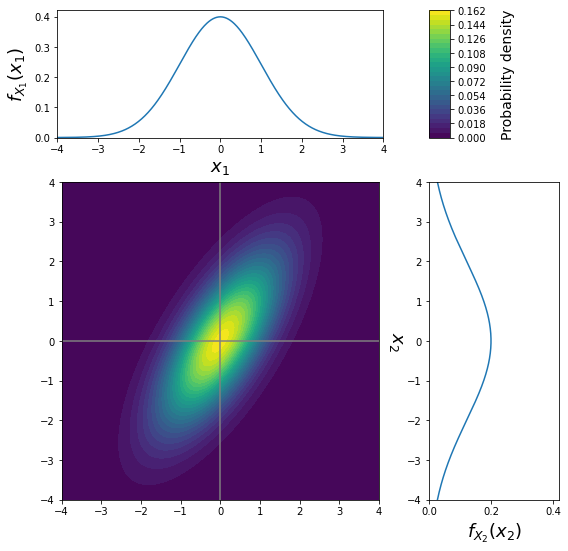

In [18]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5, 1],
                       height_ratios=[1, 2.5])
x1 = np.linspace(-4, 4, 500)
x2 = np.linspace(-4, 4, 500)
X1_mat, X2_mat = np.meshgrid(x1, x2)

mu =np.array([[0], [0]])
Sigma = np.array([[1, 1],
                  [1, 2]])
pos = np.array([X1_mat.flatten(), X2_mat.flatten()]).T
mvn = multivariate_normal(mu.flatten(), Sigma)
pdf_x1= norm.pdf(x1, mu[0], Sigma[0, 0])
pdf_x2= norm.pdf(x2, mu[1], Sigma[1, 1])

# Plot marginal PDF of X_1
ax1 = plt.subplot(gs[0])
ax1.plot(x1, pdf_x1)
ax1.set_xlabel('$x_1$', fontsize=18)
ax1.set_ylabel("$f_{X_1}(x_1)$", fontsize=18)
ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 0.42)

# Plot MVN PDF
ax3 = plt.subplot(gs[2])

contour = ax3.contourf(X1_mat, X2_mat,
             mvn.pdf(pos).reshape(500,500),
             cmap='viridis', levels=30)

ax3.axhline(y=0, color='gray')
ax3.axvline(x=0, color='gray')
ax3.set_aspect('equal')
ax3.set_xlim(-4, 4)
ax3.set_ylim(-4, 4)

# add the colorbar
ax2 = plt.subplot(gs[1])
ax2.set_visible(False)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(contour, cax=cax)
cbar.ax.set_ylabel('Probability density', fontsize=14, labelpad=15)

# Plot marginal PDF of X_1
ax4 = plt.subplot(gs[3])
ax4.plot(pdf_x2, x2)
ax4.set_ylabel('$x_2$', fontsize=18, rotation=-90, labelpad=20)
ax4.set_xlabel("$f_{X_2}(x_2)$", fontsize=18)
ax4.set_xlim(0, 0.42)
ax4.set_ylim(-4, 4)

plt.show()